In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
not_null  = pd.notnull(star_wars["RespondentID"])
star_wars = star_wars[not_null]


In [5]:
six_films = "Have you seen any of the 6 films in the Star Wars franchise?"
fan = "Do you consider yourself to be a fan of the Star Wars film franchise?"
yes_no_nan = {"Yes": True, "No": False}
star_wars[six_films].value_counts(dropna=False)


Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars[fan].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
star_wars[six_films] = star_wars[six_films].map(yes_no_nan)
star_wars[fan] = star_wars[fan].map(yes_no_nan)

In [8]:
c = star_wars.columns[3:9].tolist()
print(c)

['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']


In [9]:
name={}
for col,i in enumerate(c):
    name[i] = "seen_"+str(col+1)
    
print(name.values())    

dict_values(['seen_3', 'seen_5', 'seen_2', 'seen_6', 'seen_4', 'seen_1'])


In [10]:
star_wars = star_wars.rename(columns=name)
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}
for col in name.values():
    star_wars[col] = star_wars[col].map(movie_mapping)

In [11]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
name = {}
for i, col in enumerate(star_wars.columns[9:15].tolist()):
    name[col] = "ranking_" + str(i+1)
star_wars = star_wars.rename(columns=name)



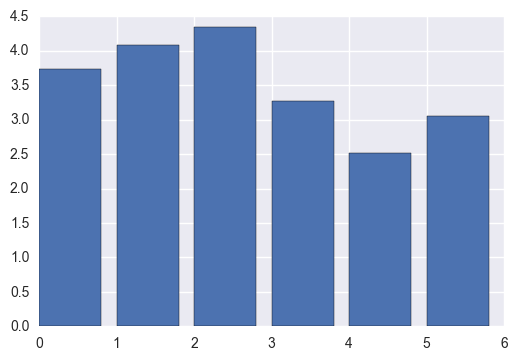

In [12]:
ranking=star_wars[star_wars.columns[9:15]].mean()
plt.bar(range(6), ranking)
plt.show()

# Rankings
The first 3 movies i.e. episode 4, 5, 6 are rated highly than 1,2,3. Overall the episode 5 is the highest rated.

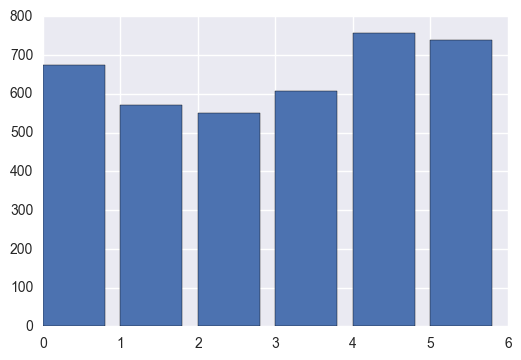

In [13]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
plt.show()

# View Counts
The empire strikes back is the most viewed film followed by the return of the jedi and the phantom menace

In [14]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"]== "Female"]


# Males : Most Viewed and Most Ranked

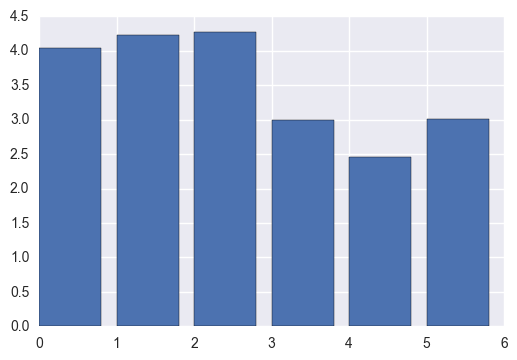

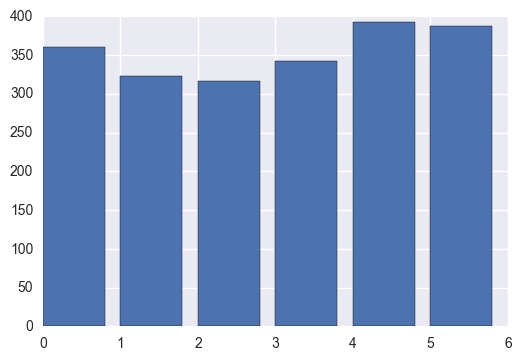

In [15]:
ranking=males[males.columns[9:15]].mean()
plt.bar(range(6), ranking)
plt.show()
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()


Similar to gender neutral analysis of ranking and view count

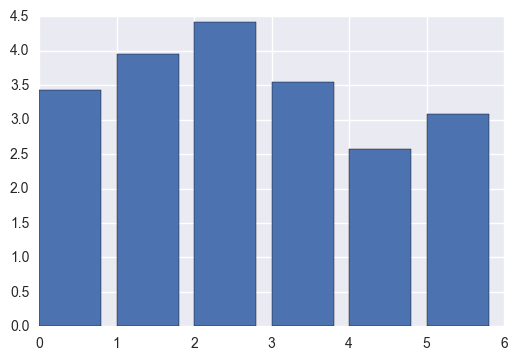

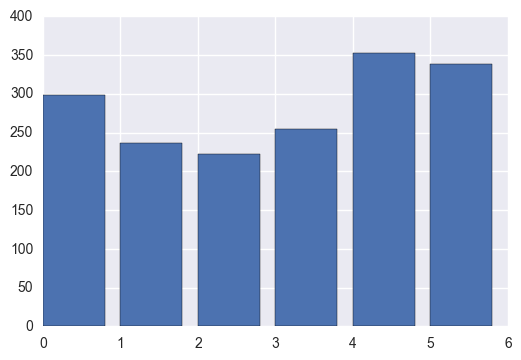

In [16]:
ranking=females[females.columns[9:15]].mean()
plt.bar(range(6), ranking)
plt.show()
plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

# Females view and ranking count
similar to gender netural counts.